In [1020]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
import os
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm

import numpy as np
os.getcwd()
os.chdir('/Users/felixelias/Downloads')

In [622]:
df=pd.read_csv('BikeData.csv',encoding='ISO-8859-1')# panel data

In [1021]:
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
264,2017-12-12,133,0,-11.0,51,1.1,2000,-19.1,0.0,0.0,0.0,Winter,No Holiday,Yes
265,2017-12-12,127,1,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes
266,2017-12-12,95,2,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,Winter,No Holiday,Yes
267,2017-12-12,54,3,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,Winter,No Holiday,Yes
268,2017-12-12,46,4,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,Winter,No Holiday,Yes
269,2017-12-12,65,5,-11.6,45,2.8,1951,-21.1,0.0,0.0,0.0,Winter,No Holiday,Yes
270,2017-12-12,104,6,-11.8,47,2.5,1973,-20.8,0.0,0.0,0.0,Winter,No Holiday,Yes
271,2017-12-12,280,7,-12.1,50,2.3,1929,-20.4,0.0,0.0,0.0,Winter,No Holiday,Yes
272,2017-12-12,580,8,-12.3,52,1.3,1914,-20.1,0.0,0.0,0.0,Winter,No Holiday,Yes
273,2017-12-12,275,9,-11.8,46,2.9,1956,-21.1,0.1,0.0,0.0,Winter,No Holiday,Yes


In [880]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8496 entries, 264 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8496 non-null   datetime64[ns]
 1   Rented Bike Count          8496 non-null   int64         
 2   Hour                       8496 non-null   object        
 3   Temperature(°C)            8496 non-null   float64       
 4   Humidity(%)                8496 non-null   int64         
 5   Wind speed (m/s)           8496 non-null   float64       
 6   Visibility (10m)           8496 non-null   int64         
 7   Dew point temperature(°C)  8496 non-null   float64       
 8   Solar Radiation (MJ/m2)    8496 non-null   float64       
 9   Rainfall(mm)               8496 non-null   float64       
 10  Snowfall (cm)              8496 non-null   float64       
 11  Seasons                    8496 non-null   object        
 12  Holi

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000,8496.000000
mean,716.832627,13.310428,58.302613,1.721022,1436.208686,4.492903,0.580056,0.152189,0.071339
std,650.319624,11.853957,20.318619,1.026314,605.569561,12.976407,0.877407,1.144558,0.427403
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,192.000000,4.200000,43.000000,0.900000,937.000000,-4.000000,0.000000,0.000000,0.000000
50%,531.000000,14.400000,57.000000,1.500000,1691.000000,5.700000,0.010000,0.000000,0.000000
75%,1082.250000,22.700000,74.000000,2.300000,2000.000000,15.125000,0.950000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# EDA

/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/1084913226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr().round(2)


<Axes: >

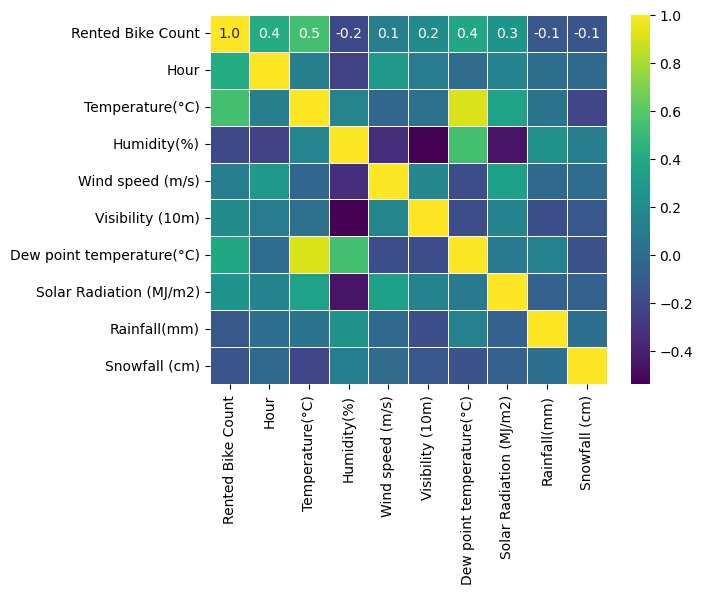

In [625]:
corr=df.corr().round(2)
corr
sns.heatmap(corr, cmap='viridis', annot=True,linewidth=.5,fmt=".1f")

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

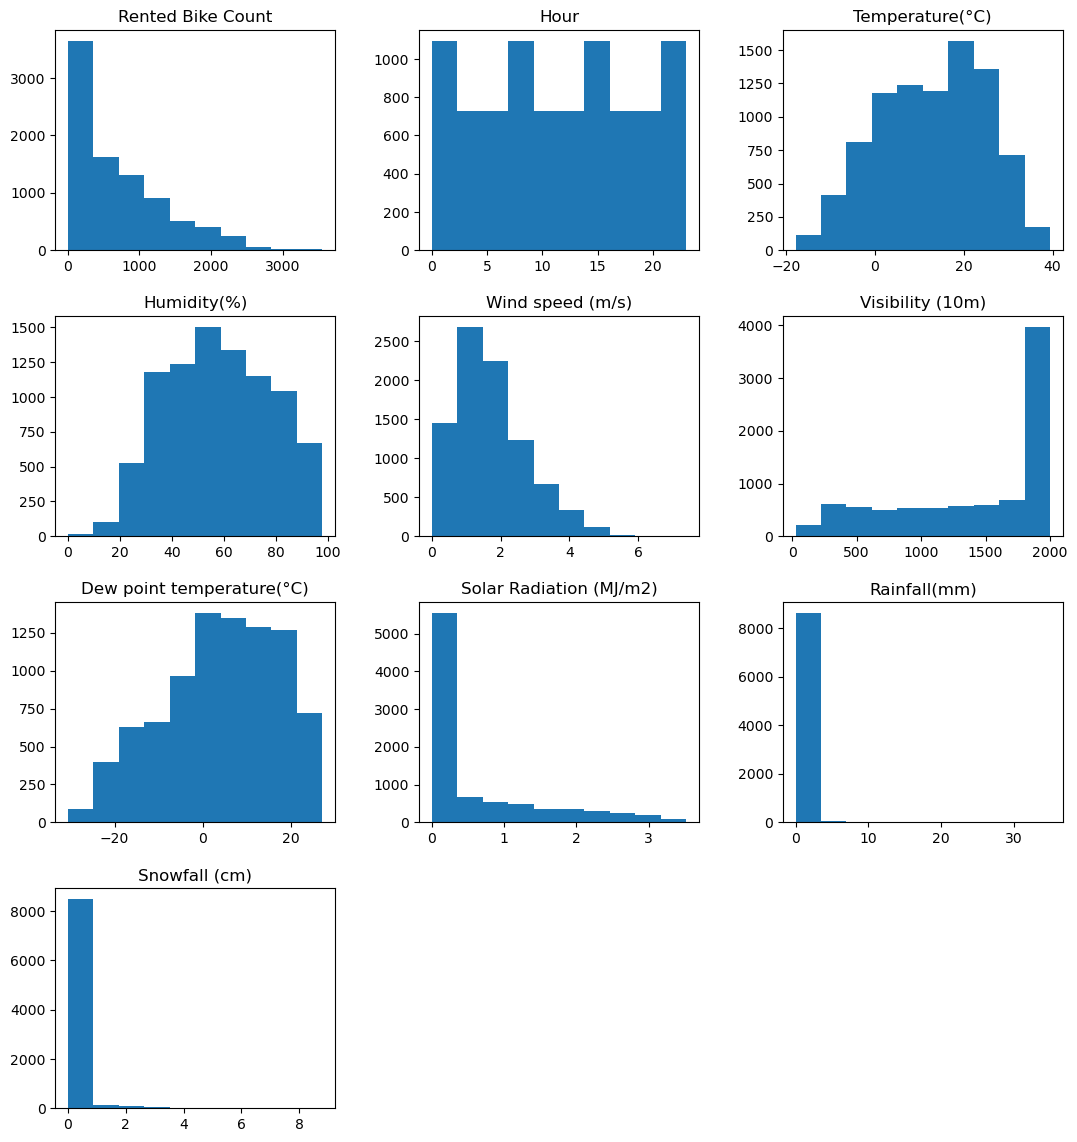

In [626]:
df.hist(figsize=(13,14), grid=False)

There seem to be outliers in rainfall, snowfall, and solar radiation columns based on how wide the histograms are. Also, the hour columns should look like a uniform  distribution since each day has 24 hours (The spikes could indicate duplicates).

In [871]:
df['Hour'].value_counts()

0     354
1     354
22    354
21    354
20    354
19    354
18    354
17    354
16    354
15    354
14    354
13    354
12    354
11    354
10    354
9     354
8     354
7     354
6     354
5     354
4     354
3     354
2     354
23    354
Name: Hour, dtype: int64

The hour variable is the time of day in military time and doesnt appear to have duplicates. 

Text(0, 0.5, 'Frequency')

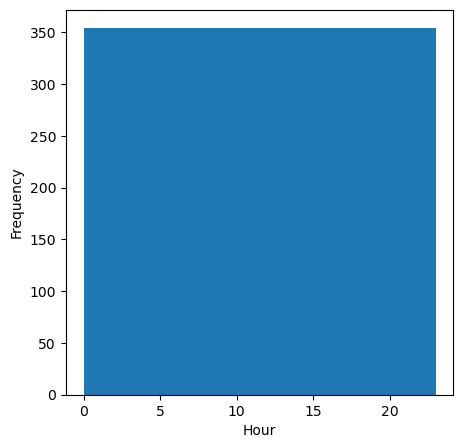

In [881]:
#double check by increasing bin number
df['Hour'].hist(figsize=(5,5), grid=False, bins=24)
plt.xlabel('Hour')
plt.ylabel('Frequency')

In [629]:
df['Functioning Day'].value_counts(normalize=True).to_frame()# Huge imbalance and will consider droping the column
df['Holiday'].value_counts(normalize=True).to_frame()# Huge imbalance and will consider droping the column
df['Seasons'].value_counts(normalize=True).to_frame()# the proportion of values are relatively equal. The dataset is 365 days which makes sense.


,Seasons
Spring,0.252055
Summer,0.252055
Autumn,0.249315
Winter,0.246575


In [630]:
df.groupby('Holiday')['Rented Bike Count'].agg(['count','mean']) # The difference in mean is wide and having the columns will help build a model.

,count,mean
Holiday,,
Holiday,432,499.756944
No Holiday,8328,715.228026


In [631]:
df.groupby('Functioning Day')['Rented Bike Count'].agg(['count','mean', 'median', 'min', 'std']).round(2) # this column doesn't seem reasonable to keep because the number on rented bikes is zero for Non Functional Hours. We shouldn't expect bike rentals in non ffuncational hours = 

,count,mean,median,min,std
Functioning Day,,,,,
No,295,0.00,0.0,0,0.00
Yes,8465,729.16,542.0,2,642.35


- This column doesn't seem reasonable to keep because the number on rented bikes is zero for Non Functional Hours. We shouldn't expect bike rentals in non funcational hours and i dont think it will help imporve a model.

In [632]:
#Change data type
df['Date']= pd.to_datetime(df['Date'])
df_sum=df.groupby(df['Date']).sum()
df_sum.head()

/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/2687385020.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']= pd.to_datetime(df['Date'])
/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/2687385020.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sum=df.groupby(df['Date']).sum()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Date,,,,,,,,,,
2017-01-12,9539,276,-58.9,1101,36.9,44898,-325.1,5.97,0.0,0.0
2017-02-12,8523,276,31.8,1487,41.1,35306,-137.2,6.33,0.0,0.0
2017-03-12,7222,276,117.0,1957,38.7,10938,45.2,3.01,4.0,0.0
2017-04-12,8729,276,-7.3,1260,82.8,32708,-238.2,6.79,0.1,0.0
2017-05-12,8307,276,-107.0,874,26.6,47027,-418.2,0.86,0.0,0.0


In [633]:
#check datatype
df_sum.index

DatetimeIndex(['2017-01-12', '2017-02-12', '2017-03-12', '2017-04-12',
               '2017-05-12', '2017-06-12', '2017-07-12', '2017-08-12',
               '2017-09-12', '2017-10-12',
               ...
               '2018-12-02', '2018-12-03', '2018-12-04', '2018-12-05',
               '2018-12-06', '2018-12-07', '2018-12-08', '2018-12-09',
               '2018-12-10', '2018-12-11'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

Text(0.5, 1.0, 'Rented Bike Count Over Time')

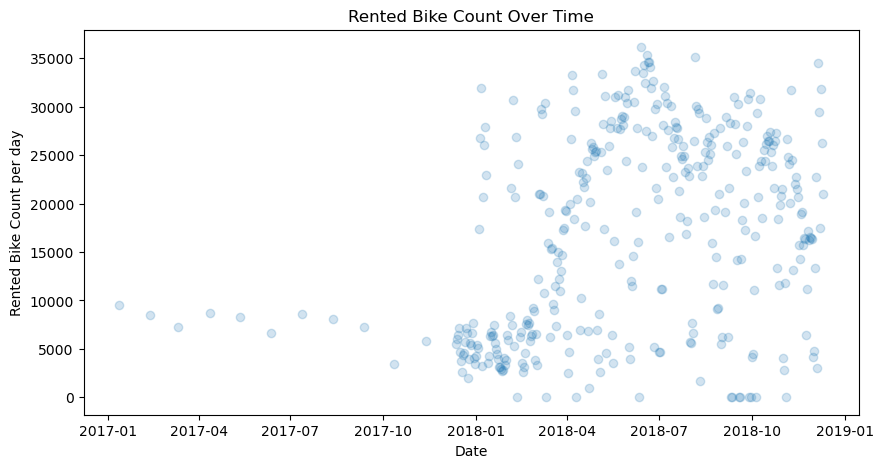

In [634]:
plt.figure(figsize=(10,5))
plt.scatter(df_sum.index, df_sum['Rented Bike Count'], alpha=.2)
plt.xlabel('Date')
plt.ylabel('Rented Bike Count per day')
plt.title('Rented Bike Count Over Time')

- The dates that are in 2017 have only one obersvation per month. Given the dataset is times-series, it needs to be continueous and removing those observations will need to be removed


In [882]:
#filter dates that are not continueous
df_sum_final=df_sum[df_sum.index > '2017-12-11']
df_sum_final.drop(columns='Hour', inplace=False) # drop hour column because it doesnt have important meaning after summing the hours

#Update the original DataFrame
df=df[df['Date'] > '2017-12-11']
df=df[df['Rented Bike Count']>0]

Text(0.5, 1.0, 'Rented Bike Count Over Time')

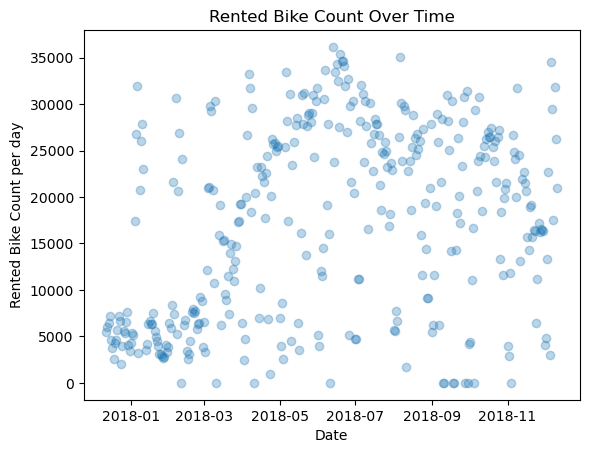

In [883]:
plt.scatter(df_sum_final.index, df_sum_final['Rented Bike Count'], alpha=.3)
plt.xlabel('Date')
plt.ylabel('Rented Bike Count per day')
plt.title('Rented Bike Count Over Time')


- The graph show a slight seasonality trend. During the winter, bike rentals are lover than during summer months which makes sense as warm weather incentivizes being outside.

/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/676837100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ave_rented=df.groupby(['Hour']).mean()


array([<Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>,
       <Axes: xlabel='Hour Military Time'>], dtype=object)

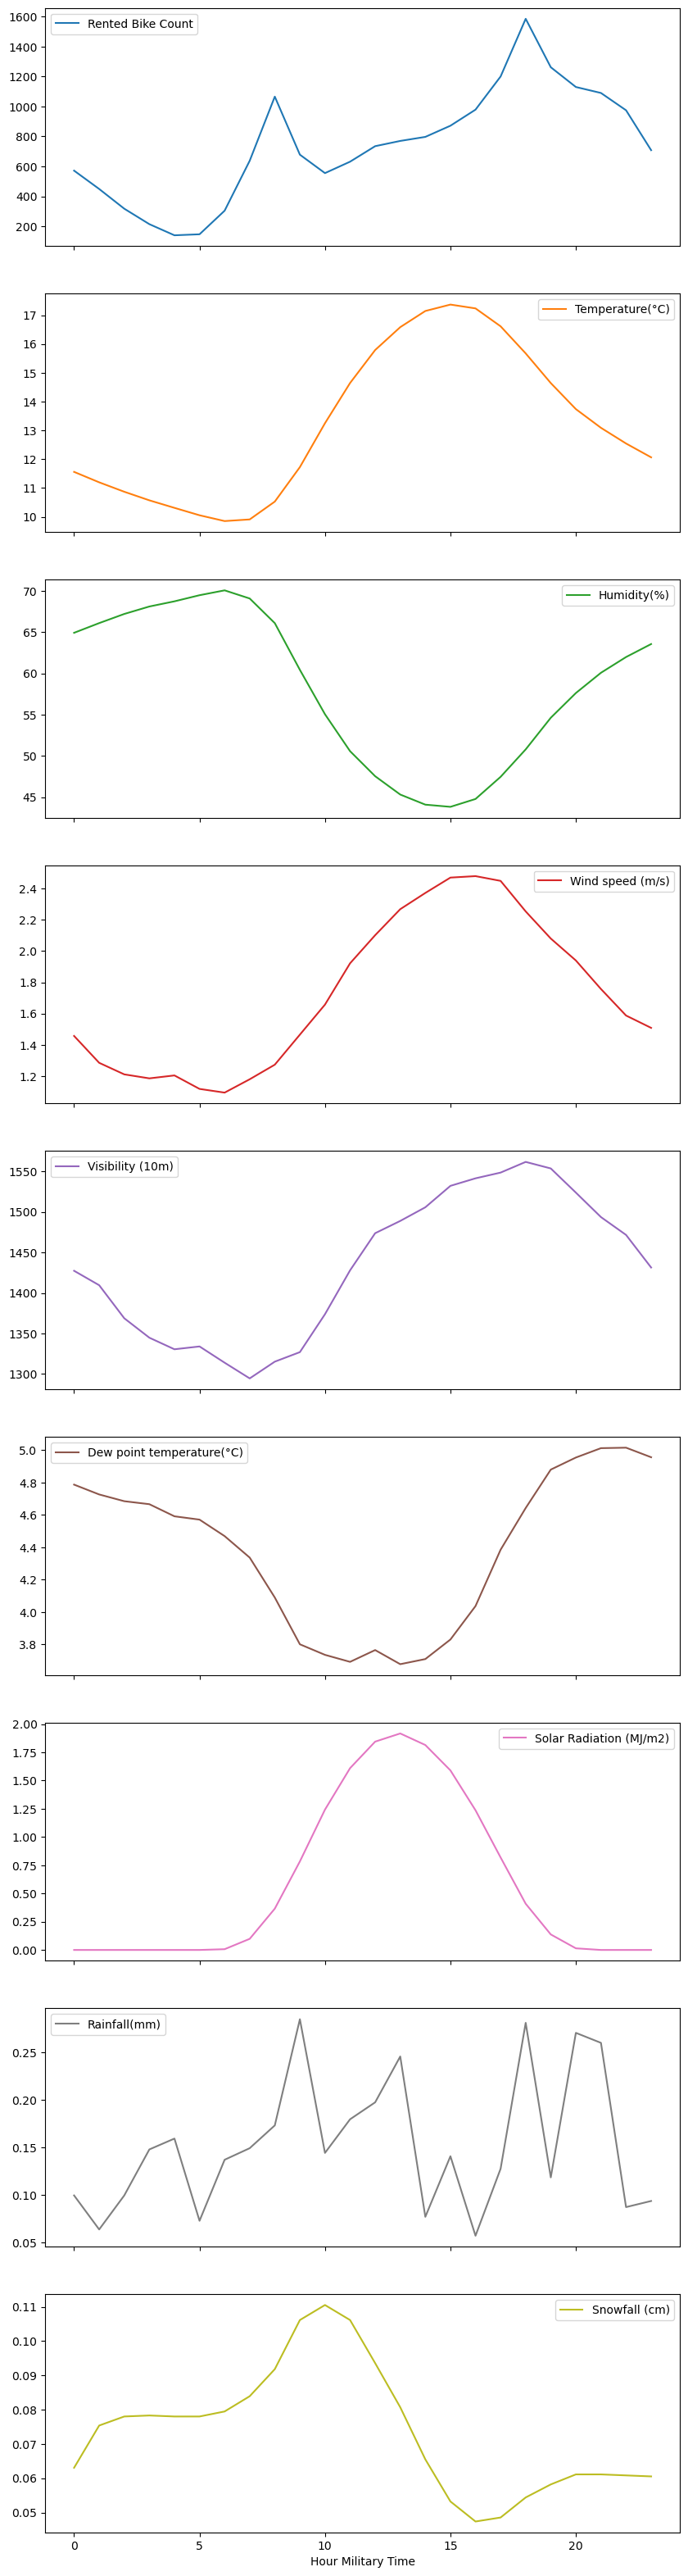

In [884]:
df_ave_rented=df.groupby(['Hour']).mean()
df_ave_rented.plot(subplots=True, figsize=(10,40), xlabel='Hour Military Time')


- Some of the graphs make sense in terms of weather patterns. For example, solar radiation is at its highest during mid day which is explained by the sun. The graph that doesn't have a trend is rainfall. It seems to fluctuate a lot and given that the city is Chigago, we should see moderate rain throughout the year.

/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/4110782783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hour= df.groupby(df['Hour']).sum()


Text(0.5, 0, 'Hour in Military Time')

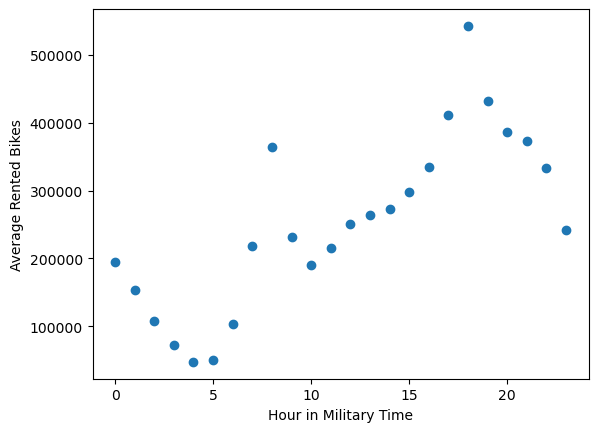

In [885]:
df_hour= df.groupby(df['Hour']).sum()
plt.scatter(df_hour.index, df_hour['Rented Bike Count'])
plt.ylabel('Average Rented Bikes')
plt.xlabel('Hour in Military Time')

In [996]:
df_model

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-12,133,-11.0,51,1.1,2000,-19.1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,127,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,95,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,54,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,46,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2018-11-30,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2018-11-30,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0


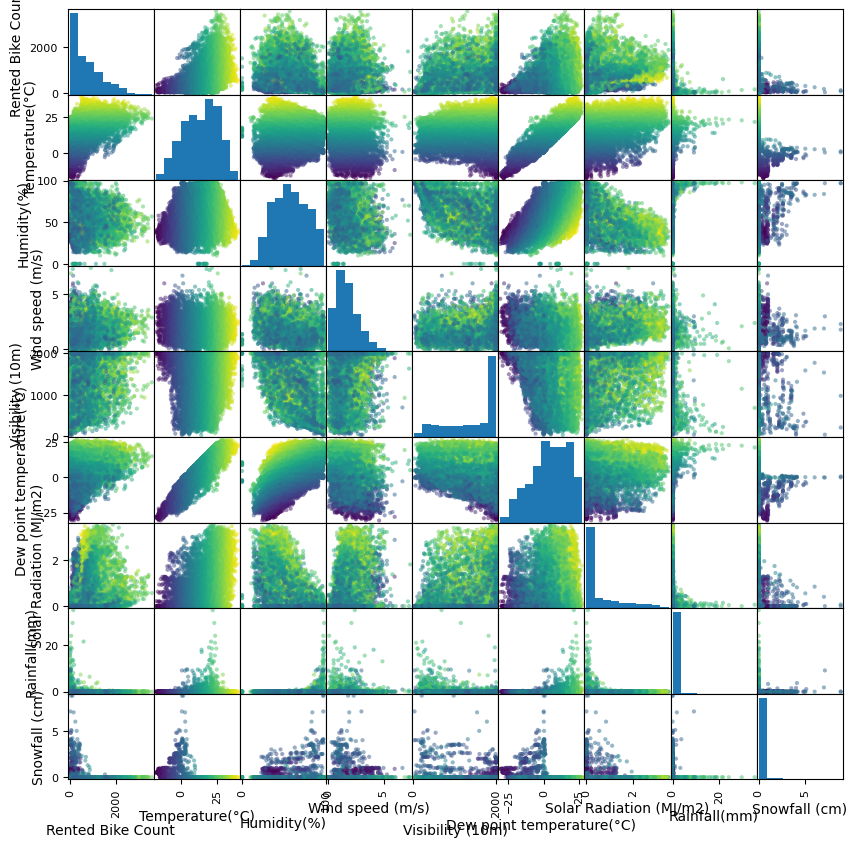

In [918]:

_=pd.plotting.scatter_matrix(df,  c=df['Temperature(°C)'], figsize=(10,10))

# Preparing model

In [893]:
#new
df_cat=df
df_cat['Hour']=df_cat['Hour'].astype(object)

In [894]:
df_cat

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
264,2017-12-12,133,0,-11.0,51,1.1,2000,-19.1,0.0,0.0,0.0,Winter,No Holiday,Yes
265,2017-12-12,127,1,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,Winter,No Holiday,Yes
266,2017-12-12,95,2,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,Winter,No Holiday,Yes
267,2017-12-12,54,3,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,Winter,No Holiday,Yes
268,2017-12-12,46,4,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [895]:
df_cat
df_model=pd.get_dummies(df_cat, columns=['Seasons','Holiday','Hour','Functioning Day'], drop_first=True)# Autumn in seasons and yes in functioning day are being left out to avoid multicollinearity. Also zero which represents 12am
df_model = df_model.set_index(['Date'])
df_model.columns
df_model

/var/folders/vc/6zl49v7s6psf338g3z3gtkp00000gn/T/ipykernel_79159/1281574803.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_model=pd.get_dummies(df_cat, columns=['Seasons','Holiday','Hour','Functioning Day'], drop_first=True)# Autumn in seasons and yes in functioning day are being left out to avoid multicollinearity. Also zero which represents 12am


,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-12,133,-11.0,51,1.1,2000,-19.1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,127,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,95,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,54,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,46,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2018-11-30,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2018-11-30,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0


# split

In [948]:
target='Rented Bike Count'
y=df_model[target]
x=df_model.drop(columns=[target])
x= sm.add_constant(x)
x

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-12,1.0,-11.0,51,1.1,2000,-19.1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,1.0,-11.2,51,1.1,2000,-19.3,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,1.0,-11.5,50,0.7,2000,-19.8,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,1.0,-11.6,50,2.2,1995,-19.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-12,1.0,-11.6,47,2.1,1982,-20.6,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-30,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
2018-11-30,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2018-11-30,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0


# Linear model 1

In [1009]:
model_1=sm.OLS(y,x)
results_1=model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     457.5
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:19:24   Log-Likelihood:                -60268.
No. Observations:                8201   AIC:                         1.206e+05
Df Residuals:                    8165   BIC:                         1.209e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1168.8603     88.355     13.229      0.000     995.663    1342.058
Temperature(°C)               7.5800      3.320      2.283      0.022       1.072      14.088
Humidity(%)                 -10.8794      0.917    -11.863      0.000     -12.677      -9.082
Wind speed (m/s)             -1.0175      4.838     -0.210      0.833     -10.501       8.466
Visibility (10m)              0.0073      0.009      0.814      0.415      -0.010       0.025
Dew point temperature(°C)    16.7252      3.437      4.867      0.000       9.989      23.462
Solar Radiation (MJ/m2)      82.4796     10.333      7.982      0.000      62.225     102.735
Rainfall(mm)                -60.9229      3.836    -15.883      0.000     -68.442     -53.404
Snowfall (cm)                32.3479     10.129      3.194      0.001      12.493      52.203
Seasons_Spring             -162.1370     12.427    -13.047      0.000    -186.497    -137.777
Seasons_Summer             -160.7027     15.409    -10.429      0.000    -190.907    -130.498
Seasons_Winter             -379.6953     18.013    -21.079      0.000    -415.006    -344.385
Holiday_No Holiday          116.3913     19.443      5.986      0.000      78.278     154.504
Hour_1                     -108.5273     28.886     -3.757      0.000    -165.151     -51.903
Hour_2                     -222.6544     28.909     -7.702      0.000    -279.323    -165.986
Hour_3                     -310.4483     28.929    -10.731      0.000    -367.156    -253.741
Hour_4                     -373.9531     28.940    -12.922      0.000    -430.683    -317.223
Hour_5                     -362.1890     28.985    -12.496      0.000    -419.007    -305.371
Hour_6                     -191.6819     29.010     -6.608      0.000    -248.548    -134.815
Hour_7                      125.7466     29.005      4.335      0.000      68.890     182.603
Hour_8                      499.9370     29.196     17.124      0.000     442.706     557.168
Hour_9                       18.4522     29.880      0.618      0.537     -40.120      77.025
Hour_10                    -220.4271     31.062     -7.096      0.000    -281.316    -159.538
Hour_11                    -230.7423     32.332     -7.137      0.000    -294.120    -167.364
Hour_12                    -188.1116     33.269     -5.654      0.000    -253.327    -122.896
Hour_13                    -184.3652     33.584     -5.490      0.000    -250.198    -118.532
Hour_14                    -176.8622     33.106     -5.342      0.000    -241.758    -111.967
Hour_15                     -86.1380     32.290     -2.668      0.008    -149.435     -22.841
Hour_16                      53.2378     31.182      1.707      0.088      -7.887     114.362
Hour_17                     341.3642     30.227     11.294      0.000     2

<Axes: >

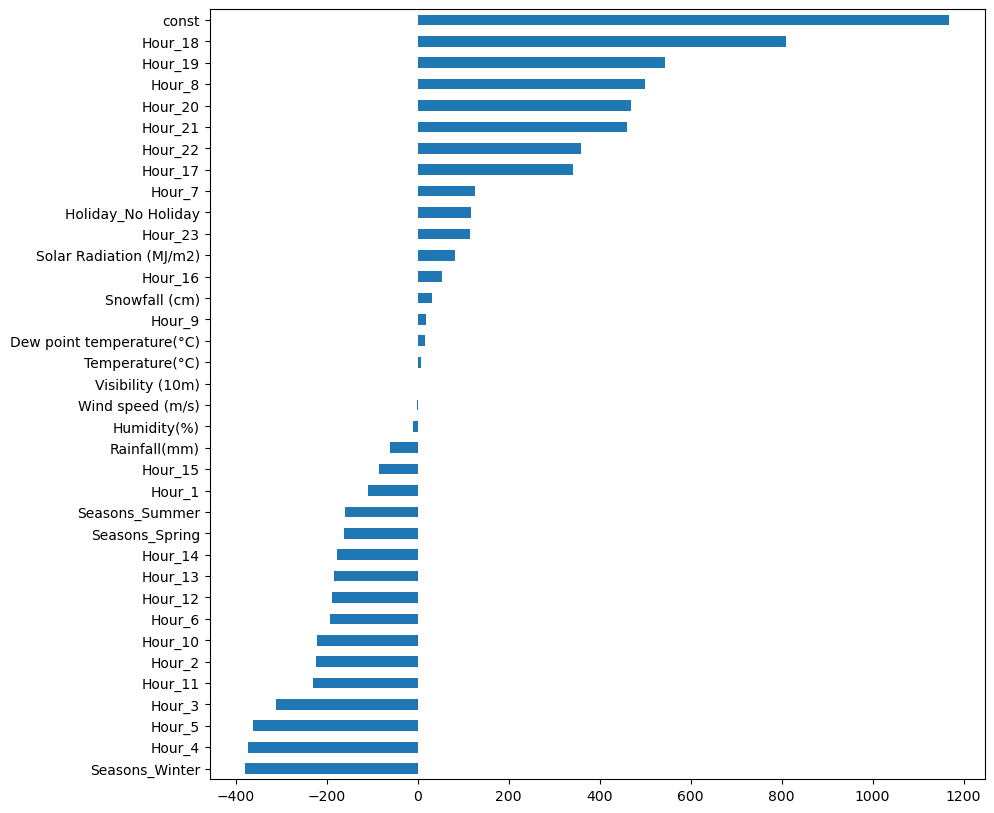

In [1010]:
results_1.params.sort_values().plot(kind='barh', figsize=(10,10))

- Its interesting to see that most of weather metrics have little to no impact for determining the amount of bike rentals which is strange because great weather should engourage individuals to be outside. Given that the city is Chicago, it could be that people in chicago are accustomed to the weather and doesn't play a big factor in their decision. It seems people's decision factor is the time of day. Also, the fall seems to be the better than other seasons given that bike rented is 160 lower in the summer.

In [1011]:
df_result=results_1.params#.plot(kind='barh', figsize=(10,10))

In [1012]:
df_hour=df_result[df_result.index.str.contains('Hour',case=False, na=False)]

df_hour = df_hour.reset_index(drop=False)

df_hour.columns
df_hour.rename(columns={'index': 'Index', 0: 'Coeff'}, inplace=True)
df_hour.head()

,Index,Coeff
0,Hour_1,-108.527291
1,Hour_2,-222.654439
2,Hour_3,-310.448337
3,Hour_4,-373.953089
4,Hour_5,-362.189016


In [1013]:

df_hour['Index']=df_hour['Index'].str.split('_', expand=True)[1]

Text(0, 0.5, 'Coefficient')

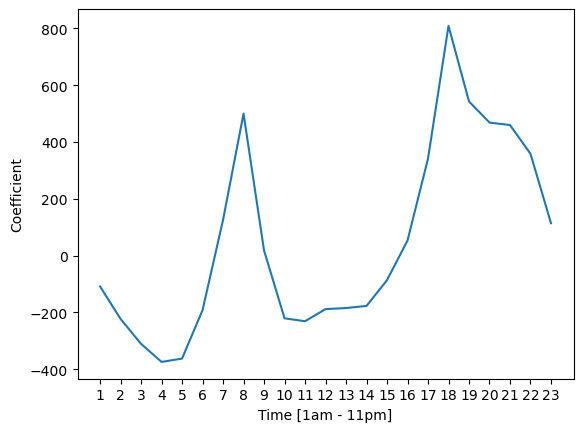

In [1014]:
plt.plot(df_hour['Index'], df_hour['Coeff'])
plt.xlabel("Time [1am - 11pm]")
plt.ylabel('Coefficient')

- These Coefficient are compared to 0 time (12am). For example, hour 23 has 106 bikes rented than in hour 0.

# log-level Model 2

In [1015]:
#log the target to look at percent change
y_log=np.log(y)
y_log

Date
2017-12-12    4.890349
2017-12-12    4.844187
2017-12-12    4.553877
2017-12-12    3.988984
2017-12-12    3.828641
                ...   
2018-11-30    6.910751
2018-11-30    6.638568
2018-11-30    6.542472
2018-11-30    6.568078
2018-11-30    6.369901
Name: Rented Bike Count, Length: 8201, dtype: float64

In [1016]:
#log-level model
model_log=sm.OLS(y_log,x)
results_log=model_log.fit()
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     590.6
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:19:29   Log-Likelihood:                -7733.8
No. Observations:                8201   AIC:                         1.554e+04
Df Residuals:                    8165   BIC:                         1.579e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.5059      0.146     58.279      0.000       8.220       8.792
Temperature(°C)              -0.0317      0.005     -5.782      0.000      -0.042      -0.021
Humidity(%)                  -0.0353      0.002    -23.291      0.000      -0.038      -0.032
Wind speed (m/s)             -0.0344      0.008     -4.308      0.000      -0.050      -0.019
Visibility (10m)          -1.782e-05   1.48e-05     -1.206      0.228   -4.68e-05    1.11e-05
Dew point temperature(°C)     0.0750      0.006     13.220      0.000       0.064       0.086
Solar Radiation (MJ/m2)       0.0931      0.017      5.452      0.000       0.060       0.127
Rainfall(mm)                 -0.2301      0.006    -36.309      0.000      -0.242      -0.218
Snowfall (cm)                 0.0086      0.017      0.514      0.607      -0.024       0.041
Seasons_Spring               -0.3477      0.021    -16.938      0.000      -0.388      -0.307
Seasons_Summer               -0.2726      0.025    -10.711      0.000      -0.323      -0.223
Seasons_Winter               -0.8931      0.030    -30.016      0.000      -0.951      -0.835
Holiday_No Holiday            0.3324      0.032     10.351      0.000       0.269       0.395
Hour_1                       -0.2025      0.048     -4.243      0.000      -0.296      -0.109
Hour_2                       -0.5179      0.048    -10.845      0.000      -0.611      -0.424
Hour_3                       -0.8881      0.048    -18.585      0.000      -0.982      -0.794
Hour_4                       -1.2710      0.048    -26.588      0.000      -1.365      -1.177
Hour_5                       -1.2324      0.048    -25.739      0.000      -1.326      -1.139
Hour_6                       -0.5656      0.048    -11.803      0.000      -0.660      -0.472
Hour_7                        0.0842      0.048      1.758      0.079      -0.010       0.178
Hour_8                        0.5321      0.048     11.033      0.000       0.438       0.627
Hour_9                        0.0399      0.049      0.808      0.419      -0.057       0.137
Hour_10                      -0.3520      0.051     -6.861      0.000      -0.453      -0.251
Hour_11                      -0.3243      0.053     -6.072      0.000      -0.429      -0.220
Hour_12                      -0.2732      0.055     -4.971      0.000      -0.381      -0.165
Hour_13                      -0.2462      0.055     -4.438      0.000      -0.355      -0.137
Hour_14                      -0.2611      0.055     -4.774      0.000      -0.368      -0.154
Hour_15                      -0.1653      0.053     -3.099      0.002      -0.270      -0.061
Hour_16                      -0.0525      0.052     -1.019      0.308      -0.153       0.048
Hour_17                       0.2292      0.050      4.590      0.000      

Model did improve when log-level was applied. The coefficents tell a similar story from the previous model but does a better job as looking at the magnitute of the coeffiencts. From the results, it is recommended that inventroy be increased from 5pm to 11pm. 

<Axes: title={'center': 'Coefficients'}, xlabel='Percent change'>

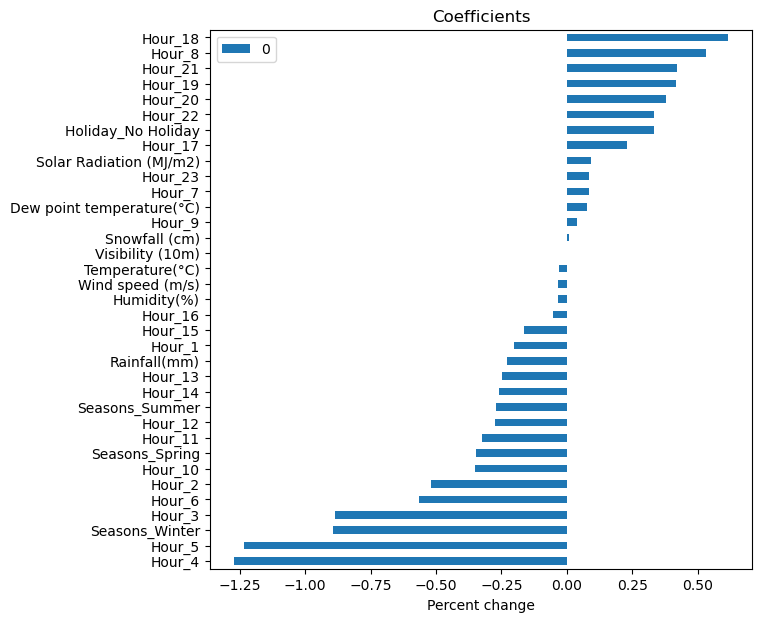

In [1017]:
df_result_log=results_log.params#.sort_values().plot(kind='barh', figsize=(5,5))
df_drop=df_result_log.to_frame()

#drop the constant coefficient to get a better picture of the magintude of coefficients
df_drop.drop(index='const', inplace=True)
df_drop.sort_values(by=0).plot(kind='barh', figsize=(7,7), xlabel='Percent change', title='Coefficients')

In [1018]:
df_hour_log=df_result_log[df_result_log.index.str.contains('Hour',case=False, na=False)]

df_hour_log= df_hour_log.reset_index(drop=False)

df_hour_log.columns
df_hour_log.rename(columns={'index': 'Index', 0: 'Coeff'}, inplace=True)
df_hour_log.head()

,Index,Coeff
0,Hour_1,-0.202464
1,Hour_2,-0.517883
2,Hour_3,-0.888144
3,Hour_4,-1.271033
4,Hour_5,-1.232397


Text(0, 0.5, 'Coefficient')

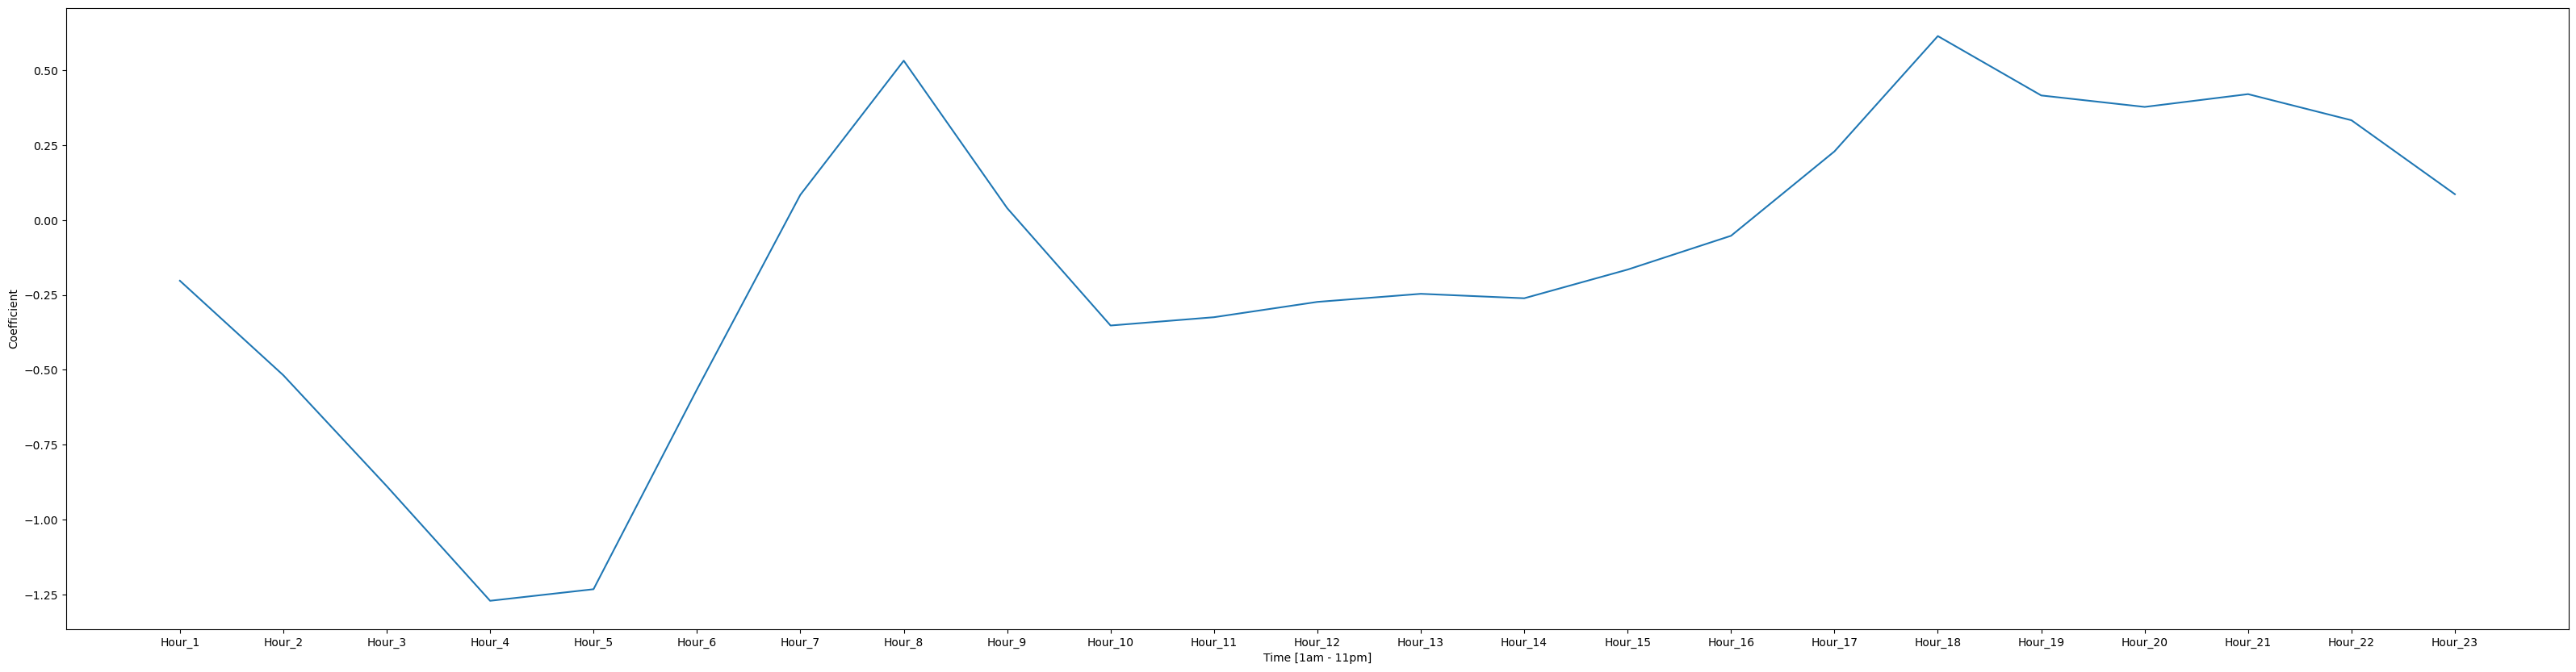

In [1019]:
plt.figure(figsize=(40,10))
plt.plot(df_hour_log['Index'], df_hour_log['Coeff'])
plt.xlabel("Time [1am - 11pm]")
plt.ylabel('Coefficient')